<h2>
Samuel Vara
<br>
GitHub: @samuelvara
<br>
</h2>

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
import statsmodels.formula.api as smf 

plt.style.use('ggplot')
np.set_printoptions(suppress=True)

<h3>(a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant</h3>

In [2]:
df = pd.read_excel('../../data/CCPP/Folds5x2_pp.xlsx', sheet_name=0)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


<h3>(b) Exploring the data:</h4>

<h5>i. How many rows are in this data set? How many columns? What do the rows and columns represent?</h5>

In [3]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print('Columns represent hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)')
print('Rows represent data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load')

Rows: 9568
Columns: 5
Columns represent hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)
Rows represent data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load


<h5>ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.</h5>

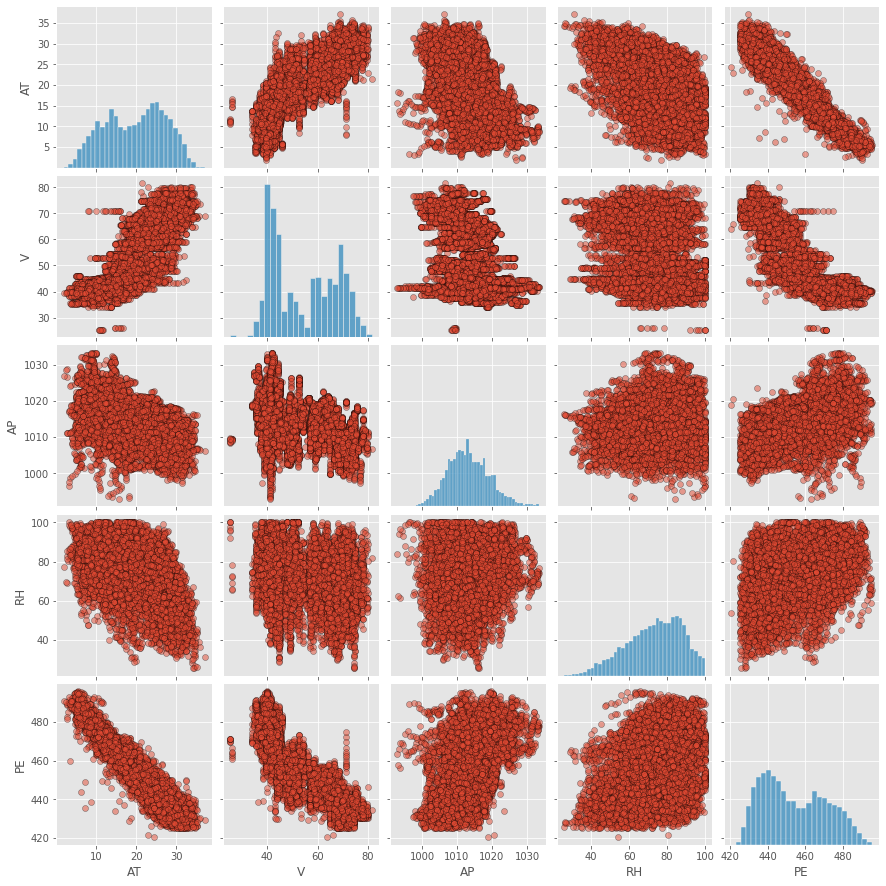

In [4]:
sns.pairplot(df, plot_kws={'alpha':0.5, 'edgecolor': 'k'})
plt.show()

<p style="font-size: 20px">There is a strong negative correlation between AT and PE, V and PE<br>
There is a positive correlation between AT and V</p>

<h5>iii. What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them in a table.</h5>

In [5]:
summ1 = df.describe().T.drop(['count', 'std'], axis=1)
summ1['range'] = summ1['max'] - summ1['min']
summ1['IQR'] = summ1['75%'] - summ1['25%']

summ1.drop(['min', 'max'], axis=1, inplace=True)
summ1.columns = ['Mean', 'First Quartile', 'Median', 'Third Quartile', 'Range', 'Inter-quartile Range']
summ1 = summ1.T

summ1


,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
Inter-quartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


<h3>(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?</h3>

In [6]:
coeffs_uni = []

In [7]:
all_lr_errors = []

In [8]:
def analyse_1f(col, plot_figure=True):
    x = df[col]
    y = df['PE']

    orig_x = x

    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()

    y_preds = model.predict(x)
    print_model = model.summary()
    print(print_model)
    print()
    print(f'P Value: {model.pvalues}')

    coeffs_uni.append([col, model.params[1]])

    train_mse = mse(model.predict(x), y)

    all_lr_errors.append((train_mse, train_mse, f'1f_{col}'))

    if plot_figure:
        fig, axs = plt.subplots(ncols=2, figsize=(10,5))
        axs[0].scatter(orig_x, y, edgecolors='k')
        axs[0].plot(orig_x, y_preds, 'y', label='Regression line')
        axs[0].set(xlabel=col, ylabel='PE', title=f'Association between {col} and PE')

        influence = model.get_influence()
        cooks = influence.cooks_distance
        cooks_distances = cooks[0]
        cooks_threshold = 4/df.shape[0]
        sns.scatterplot(x=df[col], y=cooks_distances, ax=axs[1])
        axs[1].axhline(cooks_threshold, color='blue', label='Cooks Threshold')
        axs[1].set(xlabel=col, ylabel='Cooks distances', title=f'Outliers of {col} Model')
        axs[0].legend()
        axs[1].legend()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:00   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

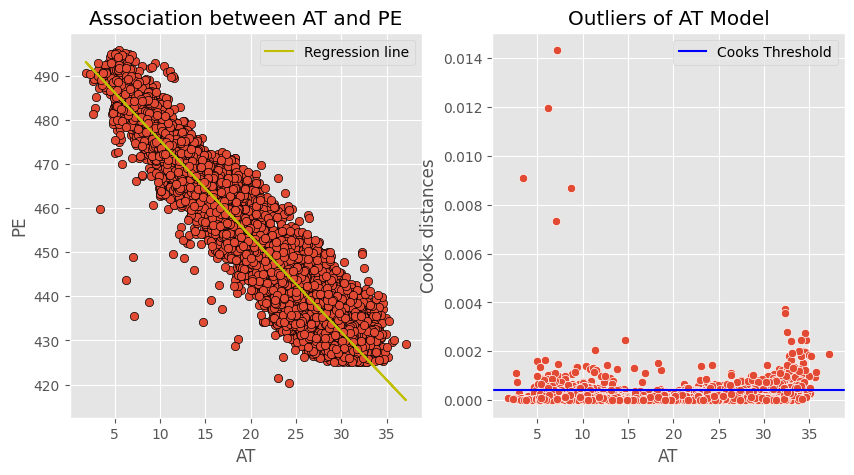

In [9]:
analyse_1f('AT')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:00   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

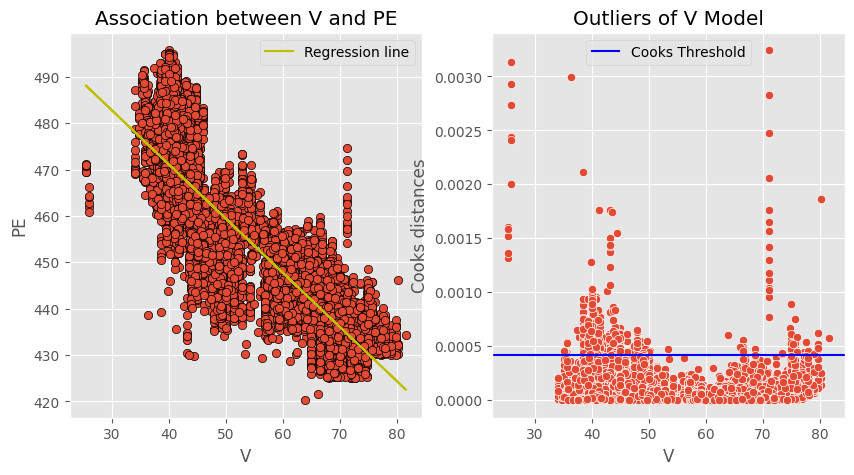

In [10]:
analyse_1f('V')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:01   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

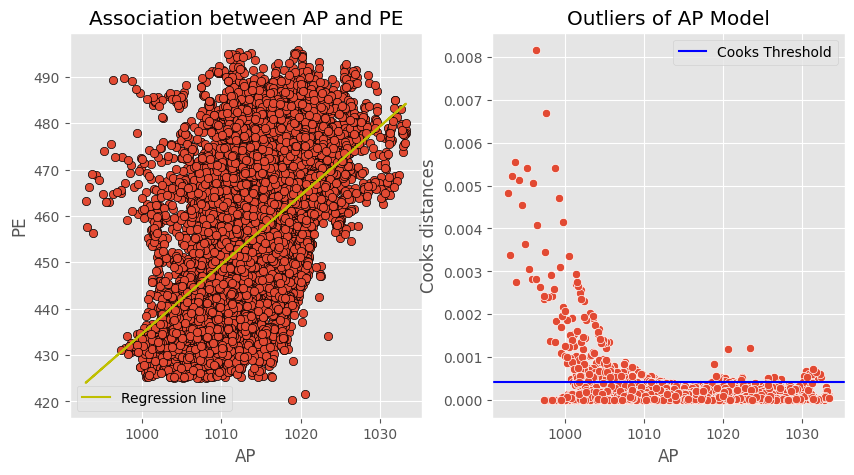

In [11]:
analyse_1f('AP')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:01   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

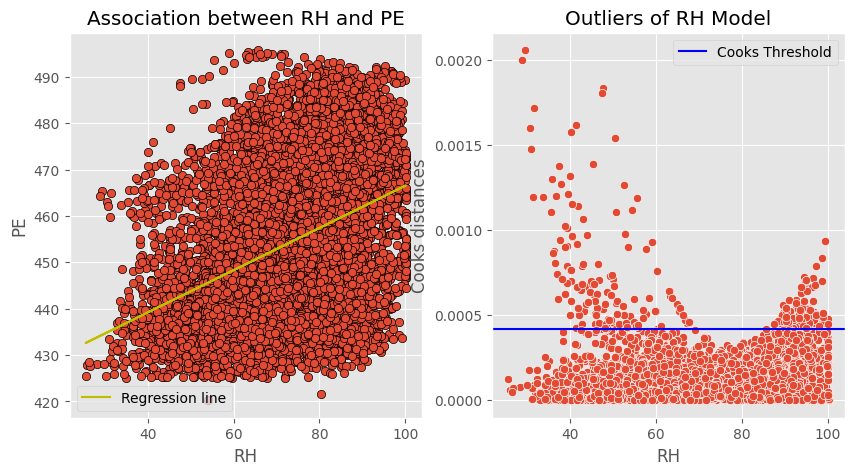

In [12]:
analyse_1f('RH')

<p style="font-size:20px"> <ol>
<li>To check if the predictor is statistically significant or not, we have to test H<sub>0</sub>:β<sub>1</sub>=0.
All predictors have a P value less than 0.05, so all predictors are statiscally significant with PE and the response.</li>
<li>There many outliers i.e, points above the Cooks distance threshold, which may be removed for better modelling of data</li><ol></p>

<h3>(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis H<sub>0</sub> : β<sub>j</sub>= 0? </h3>

In [13]:
coeffs_multi = []

In [14]:
def analyse_mf():
    x = df.drop(['PE'], axis=1)
    y = df['PE']

    orig_x = x
    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()

    train_mse = mse(model.predict(x), y)

    all_lr_errors.append((train_mse, train_mse, f'mf'))

    coeffs_multi.extend(model.params[1:])
    print_model = model.summary()
    print(print_model)
    print(f'P Value: {model.pvalues}')

analyse_mf()


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:02   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

<p style="font-size:20px">
<ol>
<li>P value for all the features is less than 0.05 i.e, all the predictors can be used to reject the null hypothesis
</li>
<li>We can use all the features to reject Null hypothesis</li>
</ol>
</p>

<h3>
e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.
</h3>

In [15]:
print(coeffs_uni)

[['AT', -2.1713199585177936], ['V', -1.1681351265557118], ['AP', 1.4898716733991142], ['RH', 0.45565010226298225]]


In [16]:
coeffs_multi

[-1.9775131066353921,
 -0.233916422582497,
 0.062082943780853106,
 -0.1580541029164112]

The coefficients in Mutivariate regression are higher for each feature


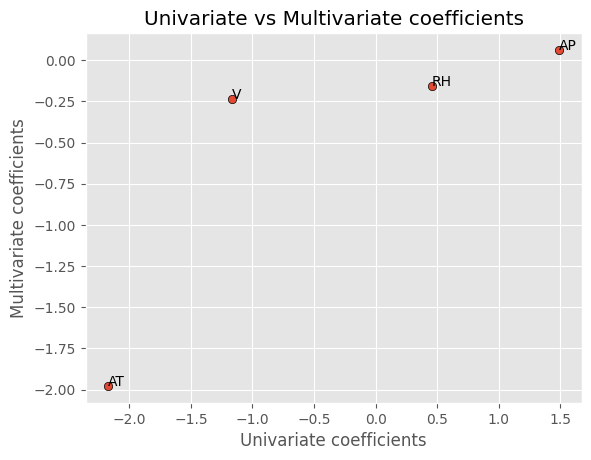

In [17]:
x, y = [v[1] for v in coeffs_uni], coeffs_multi

features = [v[0] for v in coeffs_uni]

fig, ax = plt.subplots()
ax.scatter(x, y, edgecolors='k')

for i, col in enumerate(features):
    ax.annotate(col, (x[i], y[i]))

print('The coefficients in Mutivariate regression are higher for each feature')
plt.title('Univariate vs Multivariate coefficients')
plt.xlabel('Univariate coefficients')
plt.ylabel('Multivariate coefficients')
plt.show()

<h3>(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form2
Y = β<sub>0</sub> + β<sub>1</sub>X + β<sub>2</sub>X<sub>2</sub> + β<sub>3</sub>X<sub>3</sub> + E</h3>

In [18]:
def analyse_1fnl(col):
    x = df.drop(['PE'], axis=1)
    y = df['PE']
    form = f'PE ~ {col} + I({col}**2) + I({col}**3)'
    model = smf.ols(formula=form, data=df).fit()
    train_mse = mse(model.predict(x), y)

    all_lr_errors.append((train_mse, train_mse, f'1f_nl_{col}'))
    print(model.params)
    print(model.summary(xname=["B0", "B1", "B2", "B3"]))

In [19]:
analyse_1fnl('AT')

Intercept     492.728143
AT             -0.610346
I(AT ** 2)     -0.125138
I(AT ** 3)      0.002675
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [20]:
analyse_1fnl('V')

Intercept    554.146849
V             -2.144377
I(V ** 2)     -0.002712
I(V ** 3)      0.000134
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [21]:
analyse_1fnl('AP')

Intercept      0.074694
AP            25.255593
I(AP ** 2)    -0.049952
I(AP ** 3)     0.000025
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [22]:
analyse_1fnl('RH')

Intercept     468.413536
RH             -1.729211
I(RH ** 2)      0.032145
I(RH ** 3)     -0.000152
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

<h5>For features AT, AP and RH, the quadratic and cubic coefficients are statistically significant. For V, Cubic terms are statistically significant in predicting PE. So there is evidence of non-linear association with AT, V, AP and RH.</h5>

<h3>(g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.</h3>

In [23]:
def analyse_afintr():
    x = df.drop(['PE'], axis=1)
    y = df['PE']
    model = smf.ols(formula='PE ~ AT*V + V*AP + AP*RH + RH*AT + V*RH + AT*AP', data=df).fit()
    train_mse = mse(model.predict(x), y)

    all_lr_errors.append((train_mse, train_mse, f'af_intr'))
    print(model.summary())

analyse_afintr()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

<p style="font-size:20px">V:AP, AP:RH, AT:V and RH:AT have their p values less 0.05, so there is evidence of association of interactions of predictors with the response. The above terms are statistically significant interaction terms.</p>

<h3>(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.</h3>

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

old_model = smf.ols(formula=f'PE ~ AT*V + V*AP + AP*RH + RH*AT + V*RH + AT*AP + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)', data=train).fit()

old_train_mse = mse(old_model.predict(train.drop(['PE'], axis=1)), train['PE'])
old_test_mse = mse(old_model.predict(test.drop(['PE'], axis=1)), test['PE'])

all_lr_errors.append((old_test_mse, old_train_mse, f'all_cols_intr_quad'))


print(old_model.summary())

print('Train MSE:', old_train_mse)
print('Test MSE:', old_test_mse)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7664.9809   1429.568     -5.362      0.0

In [25]:
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

train, test = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

new_model = smf.ols(formula=f'PE ~ AT*V + AP*RH + RH*AT + I(AT**2) + I(AP**2) + I(RH**2)', data=train).fit()

new_train_mse = mse(new_model.predict(train.drop(['PE'], axis=1)), train['PE'])
new_test_mse = mse(new_model.predict(test.drop(['PE'], axis=1)), test['PE'])

all_lr_errors.append((new_train_mse, new_test_mse, f'all_cols_intr_quad_opt'))

print(new_model.summary())

print('Train MSE:', new_train_mse)
print('Test MSE:', new_test_mse)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.046e+04   1091.512     -9.581      0.0

In [26]:
print('Train MSE (with insignificant variables):', old_train_mse)
print('Test MSE (with insignificant variables):', old_test_mse)
print('Train MSE (without insignificant variables):', new_train_mse)
print('Test MSE (without insignificant variables):', new_test_mse)
print('We can improve your model using possible interaction terms or nonlinear associations between the predictors and response')

Train MSE (with insignificant variables): 17.887799616633437
Test MSE (with insignificant variables): 18.647312478576065
Train MSE (without insignificant variables): 17.917812671185587
Test MSE (without insignificant variables): 18.69434619080704
We can improve your model using possible interaction terms or nonlinear associations between the predictors and response


<h3>(i) KNN Regression:</h3>

<h4>i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.</h4>

100%|██████████| 100/100 [00:33<00:00,  3.00it/s]


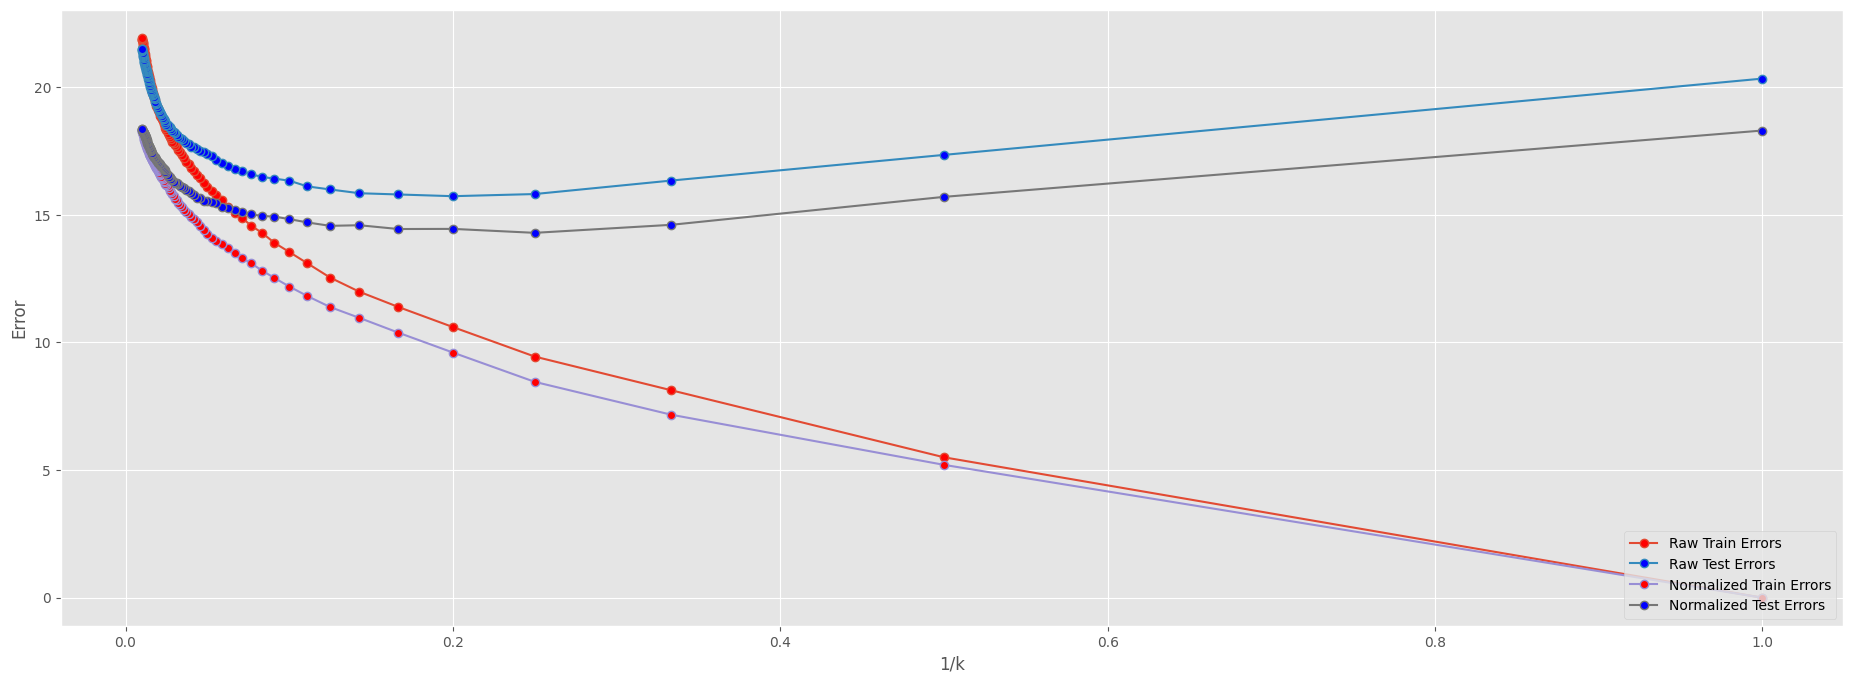

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

errors = []

X_train = train.drop(['PE'], axis=1)
y_train = train['PE']
X_test = test.drop(['PE'], axis=1)
y_test = test['PE']

scaler = MinMaxScaler().fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

for k in tqdm(range(1, 101)):
    err = []
    neigh = KNeighborsRegressor(n_neighbors=k)
    model = neigh.fit(X_train, y_train)    
    raw_train_error = mse(model.predict(X_train), y_train)
    raw_test_error = mse(model.predict(X_test), y_test)
    err.extend([k, raw_train_error, raw_test_error])

    neigh = KNeighborsRegressor(n_neighbors=k)
    model = neigh.fit(norm_x_train, y_train)    
    norm_train_error = mse(model.predict(norm_x_train), y_train)
    norm_test_error = mse(model.predict(norm_x_test), y_test)
    err.extend([norm_train_error, norm_test_error])
    errors.append(err)

all_k = [1/x[0] for x in errors]
raw_train_errs = [x[1] for x in errors]
raw_test_errs = [x[2] for x in errors]
norm_train_errs = [x[3] for x in errors]
norm_test_errs = [x[4] for x in errors]

plt.figure(figsize=(23,8))
plt.plot(all_k, raw_train_errs, marker='o', markerfacecolor='red')
plt.plot(all_k, raw_test_errs, marker='o', markerfacecolor='blue')
plt.plot(all_k, norm_train_errs, marker='o', markerfacecolor='red')
plt.plot(all_k, norm_test_errs, marker='o', markerfacecolor='blue')
plt.legend(["Raw Train Errors", "Raw Test Errors", "Normalized Train Errors", "Normalized Test Errors"], loc ="lower right")
plt.xlabel('1/k')
plt.ylabel('Error')
plt.show()

In [28]:
min_knn_error_raw = min(errors, key=lambda x:x[2])
min_knn_error_norm = min(errors, key=lambda x:x[4])
min_lr_error = min(all_lr_errors)

rk, rrtr, rrte, rntr, rnte = min_knn_error_raw
nk, nrtr, nrte, nntr, nnte = min_knn_error_norm
te, tr, det = min_lr_error

print('Min KNN Error Raw')
print('K:', rk)
print('Raw testing error:', rrte)
print()
print('Min KNN Error Normalized')
print('K:', nk)
print('Normalized testing error:', nnte)
print()


Min KNN Error Raw
K: 5
Raw testing error: 15.726819842563568

Min KNN Error Normalized
K: 4
Normalized testing error: 14.291333431295715



<h3>(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.<h3>

In [29]:
print('Min KNN Error Normalized')
print('K:', nk)

print('Normalized training error:', nntr)
print('Normalized testing error:', nnte)
print()

print('Min Regression Model Error:')
print('Training error:', tr)
print('Testing error:',te)

Min KNN Error Normalized
K: 4
Normalized training error: 8.454347681797822
Normalized testing error: 14.291333431295715

Min Regression Model Error:
Training error: 18.69434619080704
Testing error: 17.917812671185587


<h5><p>The lowest training error for KNN with K=1 is 0 as each point is its own prediction. The lowest testing error using KNN involved normalizing the features and using a K=4. I got the lowest testing error of 14.291333431295715.</p>

<p>The lowest training error using Linear regression was acheived with inclcuding interaction terms, and non-linear association. I got the lowest testing error of17.917812671185587.</p>
</h5>

<h3>2. Indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
</h3>
<ol type="a">
<li>Better, The sample size n is extremely large, and the number of predictors p is small.<br>
A flexible model, utlising the large sample size, would better fit the data as it would fit the data pattern much closer than the inflexible model. The problem of overfitting would be counteracted by the large sample size.
</li>
<li>The number of predictors p is extremely large, and the number of observations n is small.<br>
Worse, The low number of observations combined with extremely large predictors, the model would overfit the data.
</li>
<li>The relationship between the predictors and response is highly non-linear.<br>
Better, A flexible model, would fit the non-linear relationship between the predictors and response, much better (since it has more degrees of freedom).
</li>
<li>The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.<br>
Worse, A flexible model, would get influenced by noise leading to more variance.
</li>
</ol>

<h3>3. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1 0 3 0 Red
2 2 0 0 Red
3 0 1 3 Red
4 0 1 2 Green
5 −1 0 1 Green
6 1 1 1 Red
Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.
</h3>


<ol type="a">
<li>
    Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.<br>
    <ol>
        <li>The Euclidean distance between (0,3,0) and (0,0,0) is 3</li>
        <li>The Euclidean distance between (2,0,0) and (0,0,0) is 2</li>
        <li>The Euclidean distance between (0,1,3) and (0,0,0) is ~3.16</li>
        <li>The Euclidean distance between (0,1,2) and (0,0,0) is ~2.23</li>
        <li>The Euclidean distance between (-1,0,1) and (0,0,0) is ~1.41</li>
        <li>The Euclidean distance between (1,1,1) and (0,0,0) is ~1.73</li>
    </ol>
</li>
<li>What is our prediction with K = 1? Why?<br>
With K=1, we choose the closest neighbor's Y (label). Here it is (-1,0,1) i.e, Green
</li>
<li>What is our prediction with K = 3? Why?<br>
With K=3, we choose the 3 closest neighbors' Y (label) and the find the most Frequent Y(label). Here the closest 3 are (-1,0,1) Green, (1,1,1) Red and (2,0,0) Red. Red is the most frequent Y. So our prediction for Y of (0,0,0) is Red
</li>
<li>If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?<br>
A model with low K value will not be smooth since the model is not generalized. A highly non-linear model has a rough decision boundary, so K would be small.
</li>
</ol>